# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd   # Untuk membaca data tabel (csv)
import numpy as np    # Untuk operasi angka
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
# 3. Memuat Dataset
# Menggunakan URL raw agar bisa langsung di-load tanpa upload manual
url_dataset = "water_potability.csv"

try:
    df_air = pd.read_csv(url_dataset)
    print("Dataset berhasil dimuat!")
except Exception as e:
    print(f"Gagal memuat dataset: {e}")

# Menampilkan 5 baris teratas untuk pengecekan awal
display(df_air.head())

# Mengecek informasi dataset (Tipe data dan apakah ada nilai null)
print("\nInformasi Dataset:")
df_air.info()

Dataset berhasil dimuat!


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

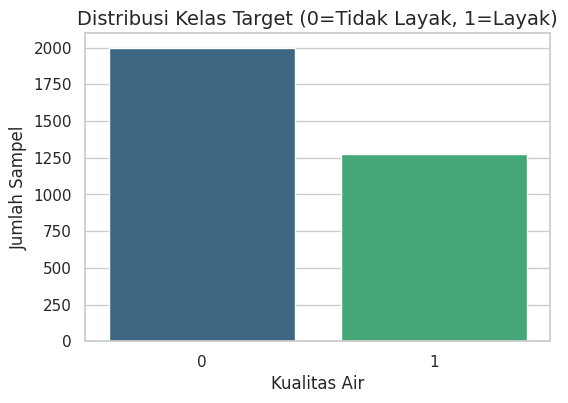

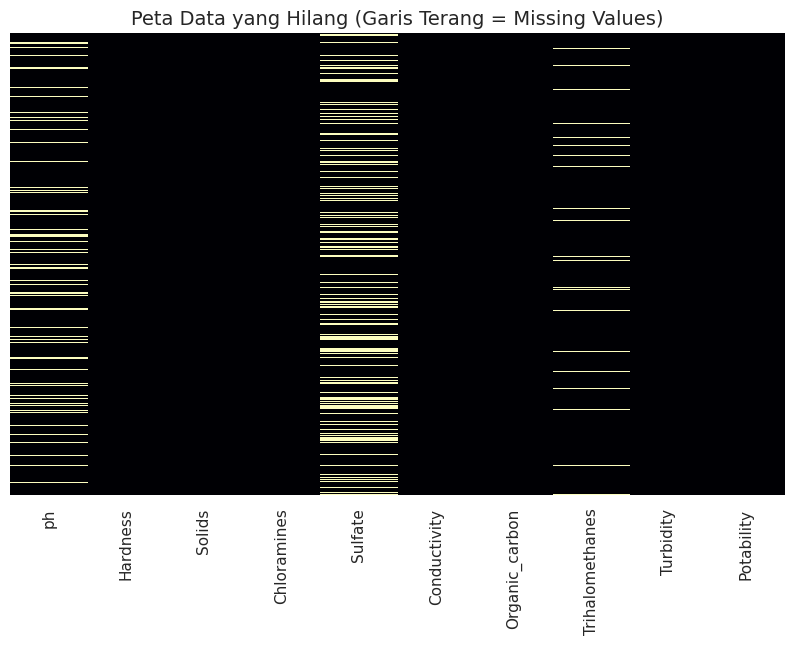


Jumlah Data Kosong per Kolom:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


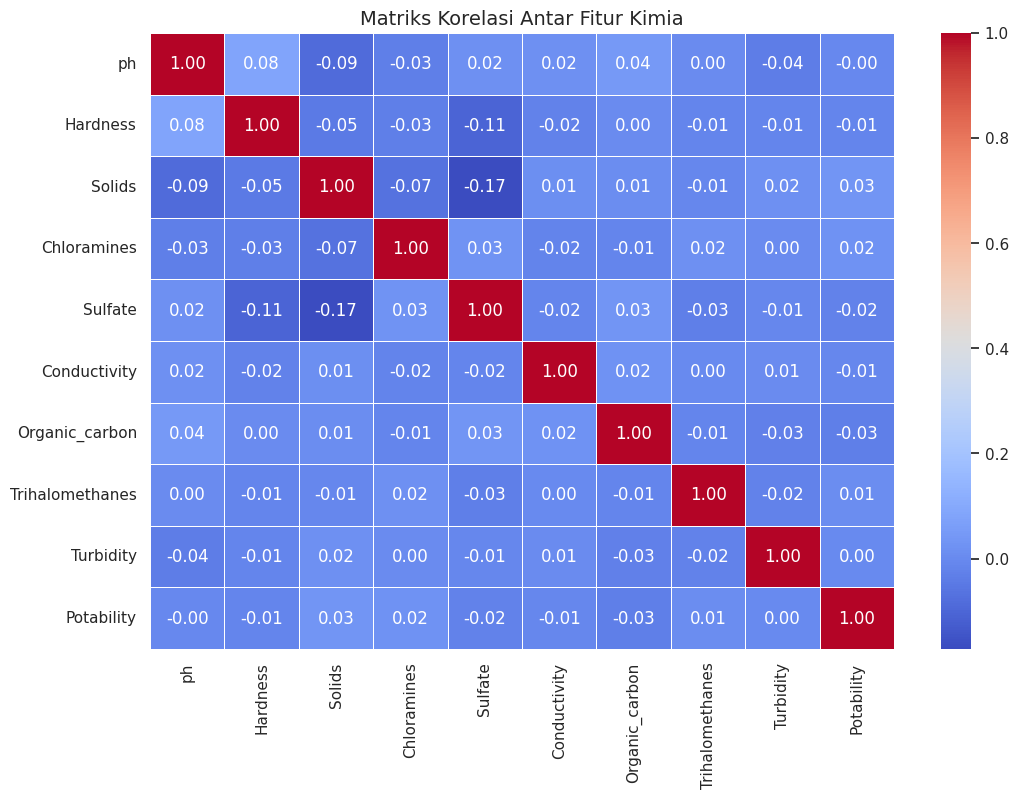


Statistik Deskriptif (Rata-rata, Min, Max):


,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [3]:
#Type your code here

if 'df_air' not in locals():
    print("⚠️ HATI-HATI: Variabel 'df_air' belum ditemukan.")
    print("Mohon jalankan dulu cell '3. Memuat Dataset' di atas ya.")
else:
    # Mengatur ukuran dan gaya visualisasi
    sns.set(style="whitegrid", context="notebook")

    # --- 1. MEMERIKSA KESEIMBANGAN TARGET (Potability) ---
    plt.figure(figsize=(6, 4))
    # Menghitung jumlah 0 (Tidak Layak) dan 1 (Layak)
    sns.countplot(x='Potability', data=df_air, palette='viridis')
    plt.title('Distribusi Kelas Target (0=Tidak Layak, 1=Layak)', fontsize=14)
    plt.xlabel('Kualitas Air')
    plt.ylabel('Jumlah Sampel')
    plt.show()

    # --- 2. MEMERIKSA MISSING VALUES (PENTING untuk Dataset Ini) ---
    # Kita buat Heatmap untuk melihat di mana saja bolongnya data
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_air.isnull(), cbar=False, yticklabels=False, cmap='magma')
    plt.title('Peta Data yang Hilang (Garis Terang = Missing Values)', fontsize=14)
    # Penjelasan: Garis-garis terang menunjukkan posisi data yang kosong (NaN)
    plt.show()

    # Menampilkan jumlah persis data yang hilang
    print("\nJumlah Data Kosong per Kolom:")
    print(df_air.isnull().sum())

    # --- 3. MELIHAT KORELASI ANTAR FITUR ---
    # Apakah PH berhubungan dengan Hardness? Kita cek di sini.
    plt.figure(figsize=(12, 8))
    correlation_matrix = df_air.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matriks Korelasi Antar Fitur Kimia', fontsize=14)
    plt.show()

    # --- 4. RINGKASAN STATISTIK ---
    print("\nStatistik Deskriptif (Rata-rata, Min, Max):")
    display(df_air.describe().T)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
if 'df_air' not in locals():
    print("Error: Variabel 'df_air' tidak ditemukan. Jalankan tahap 3 dulu.")
else:
    df_clean = df_air.copy()

    # 2. Handling Missing Values
    kolom_missing = ['ph', 'Sulfate', 'Trihalomethanes']

    print(f"Jumlah kosong sebelum handling:\n{df_clean[kolom_missing].isnull().sum()}\n")

    for kolom in kolom_missing:
        # Isi Na dengan rata-rata grup Potability
        df_clean[kolom] = df_clean[kolom].fillna(df_clean.groupby('Potability')[kolom].transform('mean'))

    print(f"Jumlah kosong SETELAH handling (Harus 0):\n{df_clean[kolom_missing].isnull().sum()}")

    # 3. Handling Duplicates
    if df_clean.duplicated().sum() > 0:
        df_clean.drop_duplicates(inplace=True)
        print("\nData duplikat ditemukan dan telah dihapus.")
    else:
        print("\nTidak ada data duplikat.")

    # 4. Feature Scaling (Standarisasi)

    # Pisahkan Fitur (X) dan Target (y)
    X = df_clean.drop('Potability', axis=1)
    y = df_clean['Potability']

    # Lakukan Scaling pada Fitur
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Ubah kembali ke DataFrame agar rapi
    X_final = pd.DataFrame(X_scaled, columns=X.columns)

    print("\n✅ Preprocessing Selesai!")
    print("Contoh data yang sudah dibersihkan dan di-scale:")
    display(X_final.head())

    # Simpan dataset bersih untuk tahap selanjutnya (opsional, untuk jaga-jaga)
    df_final = pd.concat([X_final, y.reset_index(drop=True)], axis=1)

Jumlah kosong sebelum handling:
ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

Jumlah kosong SETELAH handling (Harus 0):
ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64

Tidak ada data duplikat.

✅ Preprocessing Selesai!
Contoh data yang sudah dibersihkan dan di-scale:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.003078,0.259195,-0.139471,0.112415,0.961017,1.708954,-1.180651,1.306187,-1.286298
1,-2.289378,-2.036414,-0.385987,-0.307694,0.021560,2.062575,0.270597,-0.638440,0.684218
2,0.692826,0.847665,-0.240047,1.360594,0.021560,-0.094032,0.781117,0.001549,-1.167365
3,0.840908,0.547651,0.000493,0.592008,0.639206,-0.778830,1.255134,2.152910,0.848412
4,1.368526,-0.464429,-0.460249,-0.363698,-0.654379,-0.343939,-0.824357,-2.181556,0.138786


In [6]:
# Simpan data bersih ke file CSV
# File ini nanti dipakai untuk tahap Modeling (Kriteria 2)
df_final.to_csv('water_potability_clean.csv', index=False)

print("File 'water_potability_clean.csv' berhasil disimpan!")
print("Silakan cek menu Folder di kiri, file tersebut seharusnya sudah muncul.")

File 'water_potability_clean.csv' berhasil disimpan!
Silakan cek menu Folder di kiri, file tersebut seharusnya sudah muncul.
